In [3]:
import pandas as pd
import numpy as np
from operator import itemgetter, attrgetter
from geopy.distance import geodesic
from geopy import distance
import datetime
import math
from math import radians, cos, sin, asin, sqrt, ceil
from numpy import nan as NaN
import matplotlib.pyplot as plt


data preprocessing

In [4]:
use_cols = ['wagon_ID','altitude','latitude','longitude','signal_quality_satellite', 'signal_quality_hdop', 'determination_position', 'timestamp_measure_position', 'timestamp_transfer', 'timestamp_measure_movement_state', 'timestamp_index']
df = pd.read_csv('D:\\drittesemester\\Machine Learning Applications\\000_Data\\01_211203_TUDA_data.csv',header=0,usecols=use_cols,dtype={'wagon_ID': str,
                                    'altitude': np.float16,
                                    'latitude': np.float32,
                                    'longitude': np.float32,
                                    'signal_quality_satellite': np.float32,
                                    'signal_quality_hdop': np.float32,
                                    'determination_position': np.uint8,
                                    'timestamp_measure_position': str,
                                    'timestamp_transfer': str,
                                    'timestamp_measure_movement_state': str,
                                    'timestamp_index': str})


df=df [use_cols]

Extract GNSS signal

In [5]:
df_new=df.loc[df['determination_position']==1]
df_new.tail()

,wagon_ID,altitude,latitude,longitude,signal_quality_satellite,signal_quality_hdop,determination_position,timestamp_measure_position,timestamp_transfer,timestamp_measure_movement_state,timestamp_index
12176687,'1017603232983914',224.0,50.025391,10.218802,5.0,3.0,1,3 days 15:18:10,3 days 15:18:18.737000,NaT,3 days 15:18:21
12176691,'1017603230354522',-114.0,51.704350,6.979754,4.0,5.0,1,3 days 11:11:24,3 days 11:11:40.491000,NaT,3 days 11:11:43
12176692,'1017603248383943',43.0,50.944016,7.020907,5.0,13.0,1,2 days 23:40:57,2 days 23:41:12.765000,NaT,2 days 23:41:15
12176693,'697603222334427',175.0,52.248024,10.545093,3.0,3.0,1,3 days 14:49:47,3 days 14:50:04.454000,NaT,3 days 14:50:07
12176695,'697603212906457',294.0,49.418098,11.105467,3.0,3.0,1,3 days 19:18:45,3 days 19:19:00.179000,NaT,3 days 19:19:02


Make a scatterplot of correlated features

In [25]:
X=df_new[['signal_quality_satellite','signal_quality_hdop']]
X.head()

,signal_quality_satellite,signal_quality_hdop
0,12.0,1.2
1,11.0,2.1
2,11.0,2.0
3,11.0,1.3
4,12.0,0.9


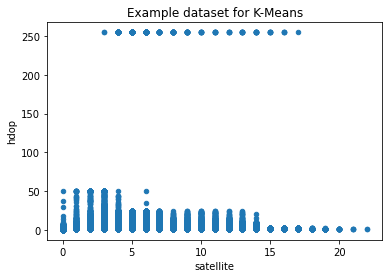

In [7]:
X.plot.scatter(x='signal_quality_satellite',y='signal_quality_hdop')
plt.title('Example dataset for K-Means')
plt.xlabel('satellite')
plt.ylabel('hdop')
plt.show()

Clustering with k-means

In [26]:
f1 = X.values

print(f1)

[[12.   1.2]
 [11.   2.1]
 [11.   2. ]
 ...
 [ 5.  13. ]
 [ 3.   3. ]
 [ 3.   3. ]]


In [27]:
class K_means:
	def __init__(self, number_of_centroids, dataset, max_iter = 10):
		self.number_of_centroids = number_of_centroids
		self.dataset = dataset
		self.number_of_features = dataset.shape[1]
		self.number_of_examples = dataset.shape[0]
		self.centroids = self.initialize_centroids()
		self.clusters = np.zeros(shape =(self.number_of_examples,1))
		self.cost = np.inf
		self.max_iter = max_iter
	
	def initialize_centroids(self):
		centroids = np.random.randint(low = -10, high = 10 , size=(self.number_of_centroids, 2))
		return centroids
	
	def compute_cost(self):
		distances = 0
		for k in range(self.number_of_centroids):
			clusters = self.clusters == k
			distances += np.sum((self.dataset[clusters[:, 0]] - self.centroids[k])**2)
		self.cost = distances

	def cluster_assignment_step(self): 
		for i in range(self.number_of_examples):
			distances = np.zeros(shape=(self.number_of_centroids, 1))
			for j in range(self.number_of_centroids):
				distances[j] = np.sum((self.dataset[i] - self.centroids[j])**2)
			self.clusters[i] = np.argmin(distances)

	def move_centroids_step(self):
		for k in range(self.number_of_centroids):
			cluster_data = self.clusters == k
			if(self.dataset[cluster_data[:, 0]].size != 0):
				self.centroids[k]= np.mean(self.dataset[cluster_data[:, 0]], axis =0) 
			else:
				self.centroids[k] = np.random.randint(low = -10, high = 10 , size=(1, 2))
	
	def run_kmeans(self):
		for i in range(self.max_iter):
			self.cluster_assignment_step()
			self.compute_cost()
			self.move_centroids_step()
		print(self.cost)
		return self.clusters
	
	def run_kmeans_verbose(self):
		old_cendroids_equal_new_cendroids = False
		for i in range(self.max_iter):
			if(not old_cendroids_equal_new_cendroids):
				self.cluster_assignment_step()
				colors = ['r', 'b']#, 'g']
				ccolors = ['darkred', 'darkblue']#, 'darkgreen']
				for k, col in enumerate(colors):
					cluster_data = self.clusters ==k
					plt.scatter(self.dataset[cluster_data[:, 0]][:, 0], self.dataset[cluster_data[:, 0]][:, 1], c = col)
					plt.scatter(self.centroids[k][0], self.centroids[k][1], c = ccolors[k], marker = 'X')
				plt.title('Example dataset for K-Means' + ' iteration #' + str(i+1))
				plt.xlabel('x1')
				plt.ylabel('x2')
				plt.show()
				self.compute_cost()
				old_cendroids = np.copy(self.centroids)
				self.move_centroids_step()
				old_cendroids_equal_new_cendroids = np.array_equal(old_cendroids ,self.centroids)
			else:
				#Runs one last iteration to update correct values
				self.cluster_assignment_step()
				colors = ['r', 'b']#, 'g']
				ccolors = ['darkred', 'darkblue']#, 'darkgreen']
				for k, col in enumerate(colors):
					cluster_data = self.clusters ==k
					plt.scatter(self.dataset[cluster_data[:, 0]][:, 0], self.dataset[cluster_data[:, 0]][:, 1], c = col)
					plt.scatter(self.centroids[k][0], self.centroids[k][1], c = ccolors[k], marker = 'X')
				plt.title('Example dataset for K-Means' + ' iteration #' + str(i+1))
				plt.xlabel('x1')
				plt.ylabel('x2')
				plt.show()
				self.compute_cost()
				break
		print(self.cost)
		return self.clusters

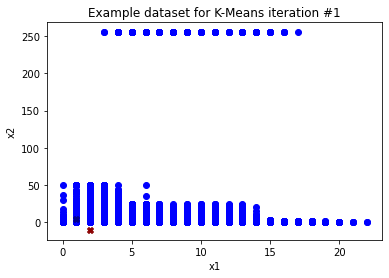

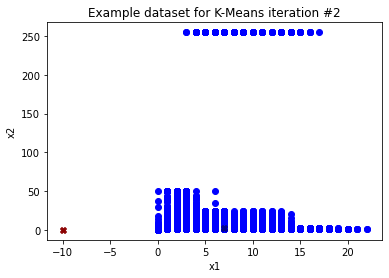

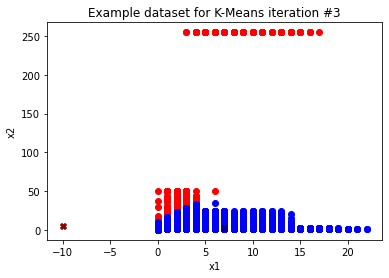

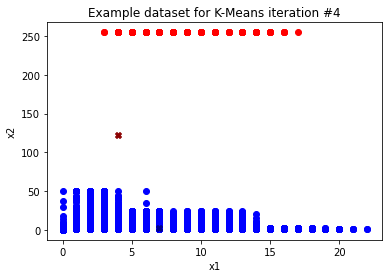

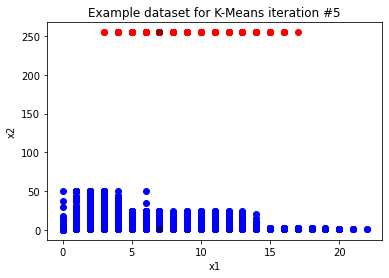

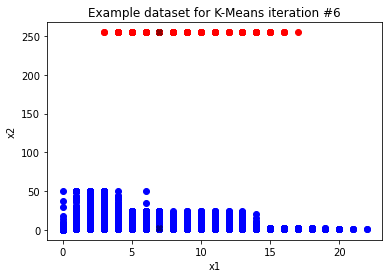

94225551.24817538


In [28]:
kmeans = K_means(2, f1)
clusters = kmeans.run_kmeans_verbose()

the statistical behavior of your features

In [4]:
pd.set_option('display.float_format',lambda x :'%.2f' % x)
hdop=df_new['signal_quality_hdop']
hdop.describe()

count   7228958.00
mean          2.88
std           2.61
min           0.00
25%           2.00
50%           2.00
75%           3.00
max         255.00
Name: signal_quality_hdop, dtype: float64

In [5]:
sqs=df_new['signal_quality_satellite']
sqs.describe()

count   7228958.00
mean          7.55
std           2.66
min           0.00
25%           5.00
50%           8.00
75%          10.00
max          22.00
Name: signal_quality_satellite, dtype: float64

good singal and  interpret results on OpenRailway maps（according to the statistical behavior）

In [7]:
import folium
import webbrowser
from folium.plugins import HeatMap

In [17]:
data=df_new.loc[(df_new['signal_quality_satellite']>10) & (df_new['signal_quality_hdop']<2)]
data.tail()

,wagon_ID,altitude,latitude,longitude,signal_quality_satellite,signal_quality_hdop,determination_position,timestamp_measure_position,timestamp_transfer,timestamp_measure_movement_state,timestamp_index
12174064,'1017603280753938',17.00,53.52,10.00,14.00,1.00,1,5 days 05:02:07,5 days 05:02:14.723000,NaT,5 days 05:02:16
12174069,'1017603280753938',26.00,53.52,10.00,15.00,1.00,1,5 days 04:52:07,5 days 04:52:15.024000,NaT,5 days 04:52:16
12174091,'1017603280753938',0.00,53.41,10.05,11.00,1.00,1,4 days 19:08:07,4 days 19:08:15.455000,NaT,4 days 19:08:17
12174104,'1017603280753938',16.00,53.41,10.05,14.00,1.00,1,2 days 23:44:01,2 days 23:44:11.937000,NaT,2 days 23:44:13
12174869,'1017603235133939',252.00,49.35,7.16,13.00,1.00,1,3 days 00:14:39,3 days 00:14:46.165000,NaT,3 days 00:14:48


In [19]:
m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()],
               zoom_start=6,
               language="en",
               min_lat=20,
               max_lat=80,
               min_lon=70,
               max_lon=-20,
               tiles='https://a.tiles.openrailwaymap.org/standard/{z}/{x}/{y}.png',
               attr='default')
lat = np.array(data['latitude'][0:len(data)])
lon = np.array(data['longitude'][0:len(data)])

new_data = [[lat[i], lon[i]] for i in range(len(data))]
HeatMap(new_data, radius=15).add_to(m)
m.save('good_signal.html')
#web.get('chrome').open('test_result27_1.html')

bad singal and  interpret results on OpenRailway maps

In [24]:
data1=df_new.loc[(df_new['signal_quality_satellite']<5) & (df_new['signal_quality_hdop']>3)]
data1.tail()

,wagon_ID,altitude,latitude,longitude,signal_quality_satellite,signal_quality_hdop,determination_position,timestamp_measure_position,timestamp_transfer,timestamp_measure_movement_state,timestamp_index
12176610,'697603275442473',138.00,59.65,12.65,2.00,5.00,1,3 days 04:15:58,3 days 04:16:14.470000,NaT,3 days 04:16:16
12176667,'697603228322475',47.00,56.03,12.72,1.00,4.00,1,3 days 08:00:19,3 days 08:00:34.019000,NaT,3 days 08:00:36
12176679,'1017603241343936',37.00,51.46,6.75,3.00,4.00,1,3 days 10:16:31,3 days 10:16:47.445000,NaT,3 days 10:16:51
12176680,'1017603238114522',-74.00,51.70,6.98,4.00,8.00,1,3 days 13:37:36,3 days 13:38:23.439000,NaT,3 days 13:38:26
12176691,'1017603230354522',-114.00,51.70,6.98,4.00,5.00,1,3 days 11:11:24,3 days 11:11:40.491000,NaT,3 days 11:11:43


In [25]:
m = folium.Map(location=[data1['latitude'].mean(), data1['longitude'].mean()],
               zoom_start=6,
               language="en",
               min_lat=20,
               max_lat=80,
               min_lon=70,
               max_lon=-20,
               tiles='https://a.tiles.openrailwaymap.org/standard/{z}/{x}/{y}.png',
               attr='default')
lat = np.array(data1['latitude'][0:len(data1)])
lon = np.array(data1['longitude'][0:len(data1)])

new_data1 = [[lat[i], lon[i]] for i in range(len(data1))]
HeatMap(new_data1, radius=15).add_to(m)
m.save('bad_signal.html')
#web.get('chrome').open('test_result27_1.html')